https://www.kaggle.com/competitions/playground-series-s3e2/discussion
https://www.kaggle.com/competitions/playground-series-s3e1/discussion

In [22]:
DATA_DIR='playground-series-s3e2/'

In [7]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import importlib

In [50]:
#load and reload if changed functions for data investigation, plots etc
import data_investigation_lib as DI
importlib.reload(data_investigation_lib);

In [25]:
df=pd.read_csv(DATA_DIR+"/train.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [45]:
DI.nans(df)

0 rows with nans out of 15304
0 nans id
0 nans gender
0 nans age
0 nans hypertension
0 nans heart_disease
0 nans ever_married
0 nans work_type
0 nans Residence_type
0 nans avg_glucose_level
0 nans bmi
0 nans smoking_status
0 nans stroke


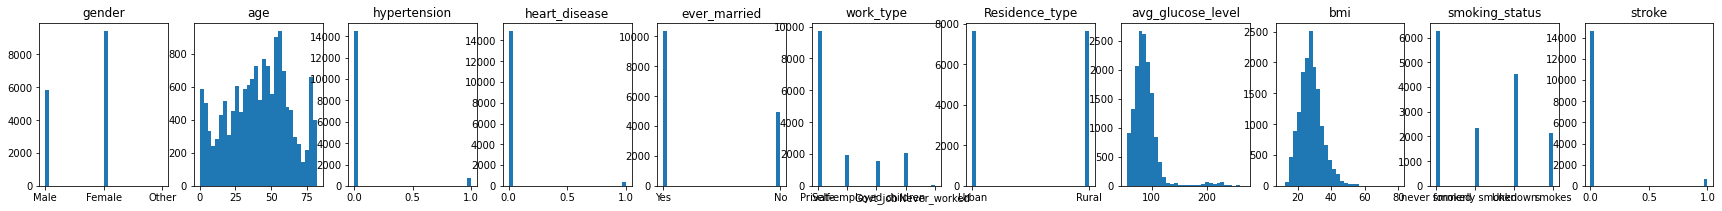

In [53]:
DI.hists(df.iloc[:,1:]) #no need to plot IDs

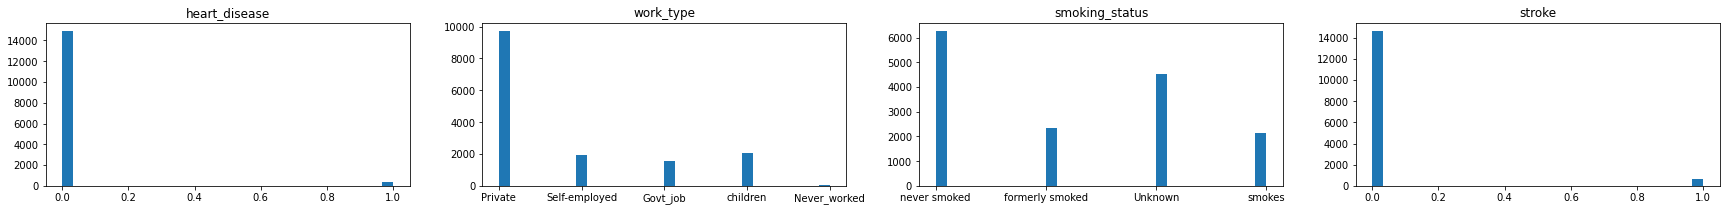

In [58]:
DI.hists(df.loc[:,['heart_disease','work_type','smoking_status','stroke']]) #closer look

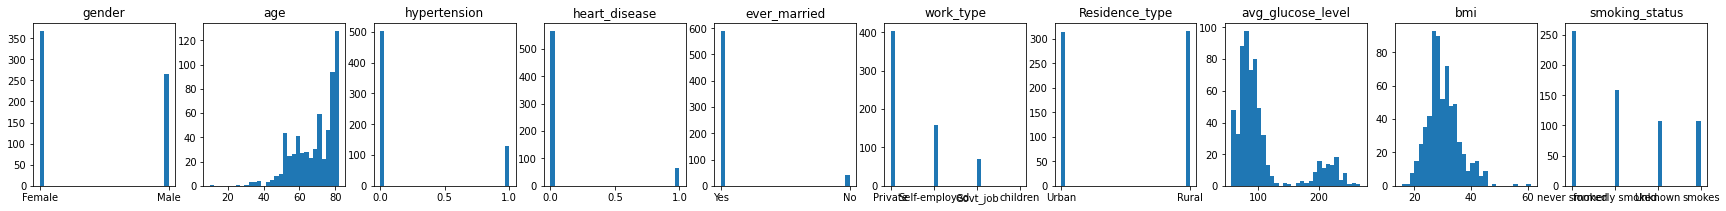

In [60]:
DI.hists(df[df["stroke"]==1].iloc[:,1:-1]) #those who had stroke

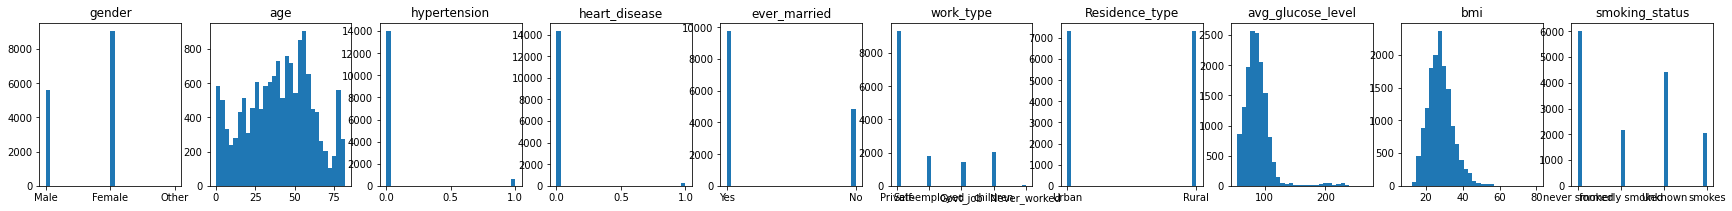

In [61]:
DI.hists(df[df["stroke"]==0].iloc[:,1:-1]) #others